In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting data

In [ ]:
df_final = pd.read_csv(r'C:\Users\Germán\Github\ProyectoFinal\data\model.csv')

In [91]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
year,41915.0,2016.696958,3.968024,1967.000000,2015.0000,2018.000000,2019.0000,2023.000000
kms,41915.0,86310.869379,55418.149124,0.000000,44000.0000,80774.000000,116701.5000,750000.000000
power,41915.0,143.523941,75.826723,5.000000,102.0000,125.000000,150.0000,999.000000
price,41915.0,19299.995658,16212.470452,0.000000,11999.0000,16250.000000,22500.0000,498000.000000
dealer_zip_code,41915.0,24543.985256,14683.508641,1002.000000,8734.0000,28230.000000,36211.0000,50820.000000
lat,41915.0,39.818599,1.969328,28.047874,37.9836,40.323704,41.3784,43.568866
long,41915.0,-2.476229,3.033641,-16.622750,-3.9862,-3.000000,-0.3763,3.238264



Objetivo del proyecto:

1- Recomendaciones personalizadas para los clientes. (En el EDA hemos podido observar ciertas tendencias de mercado que son interesantes para generar recomedaciones según las características de los coches) </br>

**2- Predicciones precisas del precio del precio del coche deseado**

Aqui trabajaremos en identificar que variables vamos a utilizar para poder realizar un modelo de predicción que nos indique el valor estimado de un coche segun ciertas características.

In [92]:
df_final.columns

Index(['make', 'model', 'version', 'fuel', 'year', 'kms', 'power', 'shift',
       'price', 'location', 'publish_date', 'dealer_address',
       'dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long',
       'state'],
      dtype='object')

In [93]:
#Eliminar 'location', 'publish_date', 'dealer_address','dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long'
df_final = df_final.drop(['location', 'publish_date', 'dealer_address','dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long',"version","state"], axis=1)

In [94]:
df_final.isnull().sum()

make     0
model    0
fuel     0
year     0
kms      0
power    0
shift    0
price    0
dtype: int64

In [87]:
df_final.columns

Index(['make', 'model', 'fuel', 'year', 'kms', 'power', 'shift', 'price'], dtype='object')

In [104]:
df_final.dtypes

make            object
model           object
fuel            object
year             int64
kms              int64
power            int64
transmission    object
price            int64
dtype: object

In [ ]:
df_final['kms'] = df_final['kms'].astype(int)
df_final['power'] = df_final['power'].astype(int)

In [105]:
#Exportar df a csv
df_final.to_csv(r"C:\Users\Germán\Github\ProyectoFinal\data\azure_data.csv", index = False)


# Heat map variables numéricas

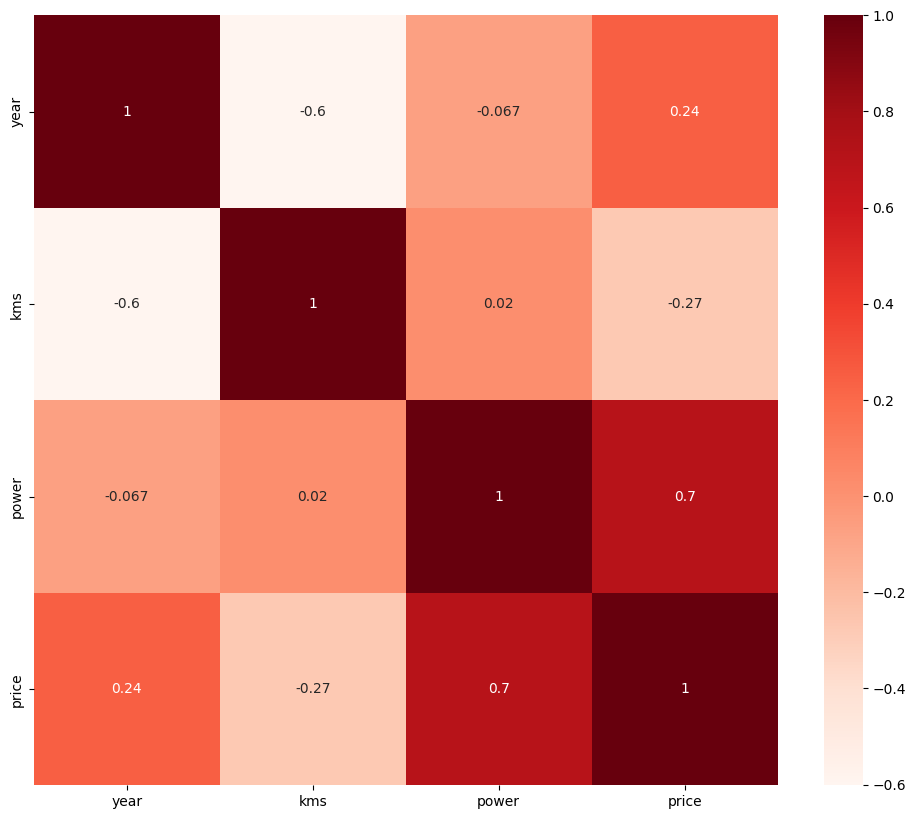

In [ ]:
num_var = df_final.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 10))
cor = df_final[num_var].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Encoding 1: Heatmap con variables categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_final.copy()

le = LabelEncoder()

df_encoded['fuel'] = le.fit_transform(df_encoded['fuel'])
df_encoded['shift'] = le.fit_transform(df_encoded['shift'])

print(df_encoded.head())

   make      model  fuel  year      kms  power  shift  price
0  Opel  Crossland     2  2022      5.0  110.0      1  22900
1  Opel  Crossland     2  2022  24847.0  110.0      1  19990
2  Opel  Crossland     0  2021  41356.0  120.0      0  18590
3  Opel  Crossland     2  2022     11.0  110.0      1  22700
4  Opel  Crossland     2  2022     11.0  110.0      1  22700


In [58]:
df_encoded.columns

Index(['make', 'model', 'fuel', 'year', 'kms', 'power', 'shift', 'price'], dtype='object')

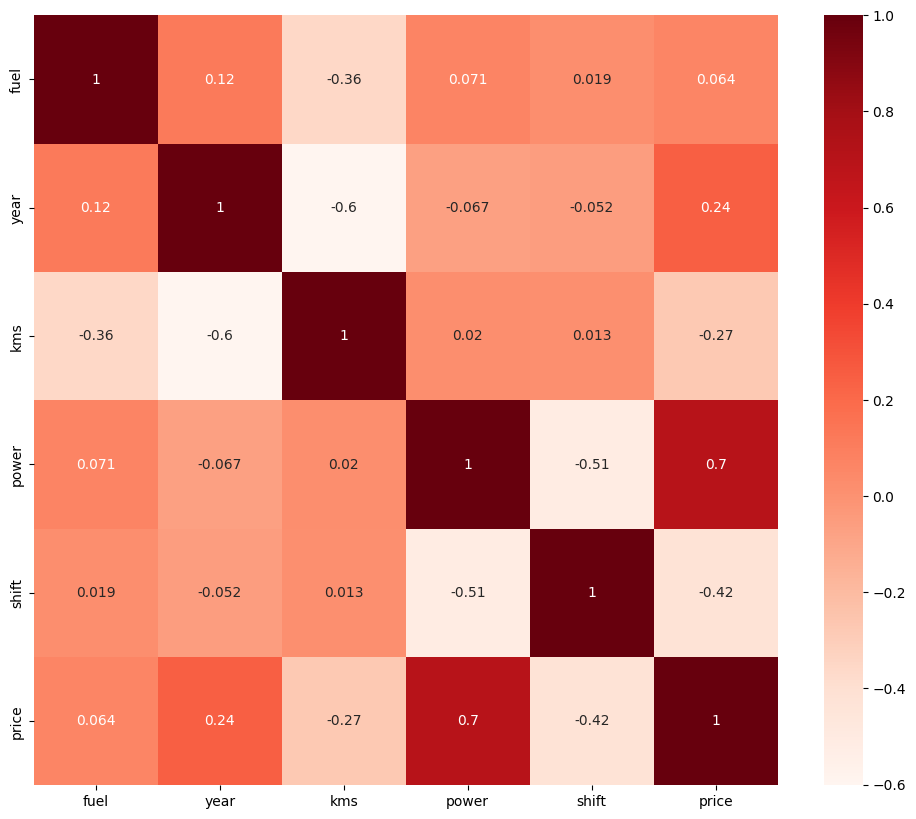

In [59]:
#Heat map de correlacion de df_encoded
plt.figure(figsize=(12, 10))
numeric_df_encoded = df_encoded.select_dtypes(include=[np.number])
cor = numeric_df_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [60]:
df_encoded.head(1)

,make,model,fuel,year,kms,power,shift,price
0,Opel,Crossland,2,2022,5.0,110.0,1,22900


# Econding 2: Heat map variables categoricas con dummies

In [96]:
df_final.rename(columns={'shift': 'transmission'}, inplace=True)


In [62]:
df_final = df_final.join(pd.get_dummies(df_final.fuel, dtype=int)).drop('fuel', axis=1)
df_final = df_final.join(pd.get_dummies(df_final.transmission, dtype=int)).drop('transmission', axis=1)


In [63]:
df_final.head(1)

,make,model,year,kms,power,price,Diésel,Eléctrico,Gasolina,Otros,automatic,manual
0,Opel,Crossland,2022,5.0,110.0,22900,0,0,1,0,0,1


In [ ]:
df_final.columns = df_final.columns.str.lower()

df_final.columns = df_final.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [65]:
df_final.columns

Index(['make', 'model', 'year', 'kms', 'power', 'price', 'diesel', 'electrico',
       'gasolina', 'otros', 'automatic', 'manual'],
      dtype='object')

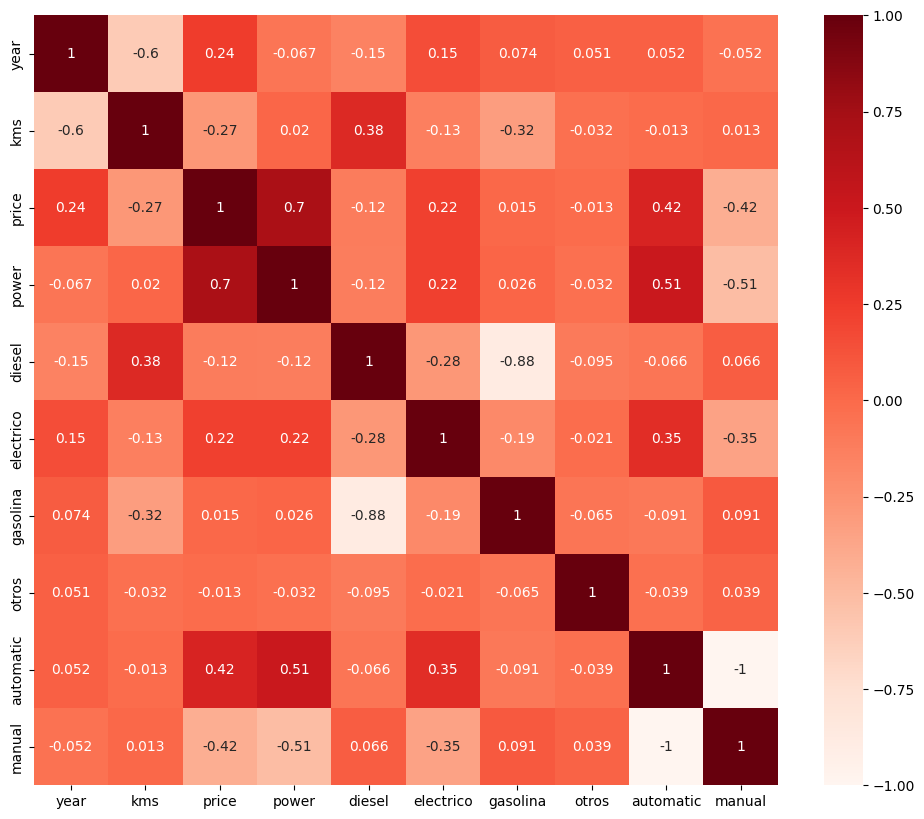

In [ ]:
df_con_dummies= df_final[['year', 'kms', 'price', 'power', 'diesel', 'electrico', 'gasolina', 'otros', 'automatic', 'manual']]

plt.figure(figsize=(12, 10))
cor = df_con_dummies.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [49]:
df_final.head(1)

,make,model,year,kms,power,price,diesel,electrico,gasolina,otros,automatic,manual
0,Opel,Crossland,2022,5.0,110.0,22900,0,0,1,0,0,1


# Distribución normal

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Germán\AppData\Local\Temp\ipykernel_26660\3212616655.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')



 mu = 19300.00 and sigma = 16212.28



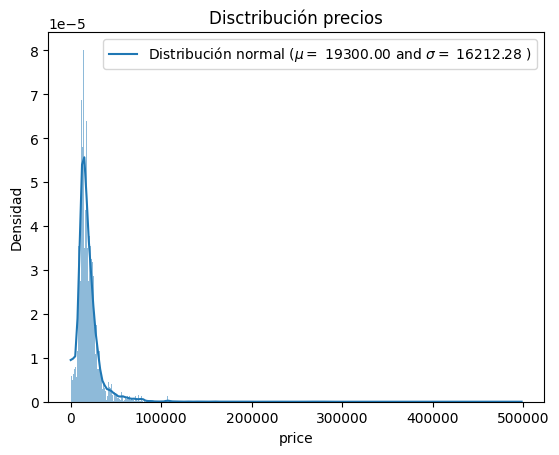

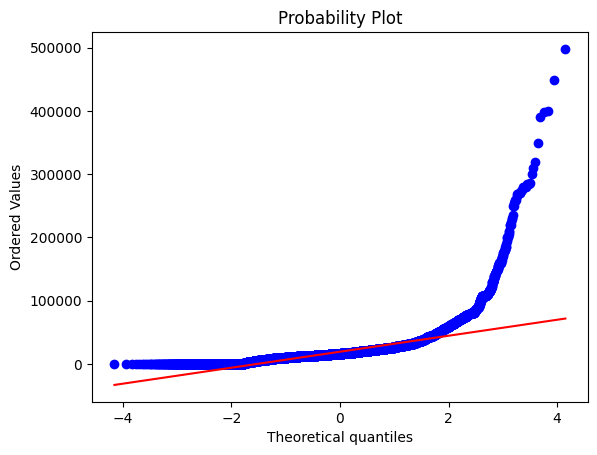

In [66]:
from scipy import stats

sns.histplot(df_final['price'], kde=True, stat="density", linewidth=0)  # Distribución de precios

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_final['price'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Densidad')
plt.title('Disctribución precios')

# Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(df_final['price'], plot=plt)
plt.show()

In [80]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
year,42355.0,2016.688183,3.977171,1967.0,2015.0,2018.0,2019.0,2023.0
kms,42355.0,86415.262566,56204.475595,0.0,44000.0,80799.0,116712.0,1330000.0
power,42355.0,152.095597,1752.963259,0.0,102.0,126.0,150.0,360571.0
price,42355.0,19320.282729,16203.775595,0.0,12089.0,16290.0,22500.0,498000.0


# Model Test

I made this just to have a first idea of the quality of our df, the final model was made with **AzureML**

In [67]:
df_final.columns

Index(['make', 'model', 'year', 'kms', 'power', 'price', 'diesel', 'electrico',
       'gasolina', 'otros', 'automatic', 'manual'],
      dtype='object')

In [70]:
print(type(df_final))

<class 'pandas.core.frame.DataFrame'>


In [71]:
%pip install scikit-learn

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Definir X e y
X = df_final[['year', 'kms', 'power', 'diesel', 'electrico', 'gasolina', 'otros', 'automatic', 'manual']]
y = df_final['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

Note: you may need to restart the kernel to use updated packages.


RandomForestRegressor()

In [73]:
forest.score(x_test, y_test)

0.88300125131377

In [75]:
from  sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': [10, 20, 30, 40, 50],
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train, y_train)

c:\Users\Germán\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [10, 20, 30, 40, 50],
                         'n_estimators': [100, 300, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
best_forest = grid_search.best_estimator_

In [78]:
best_forest.score(x_test, y_test)

0.8781700041409051

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

predictions = best_forest.predict(x_test)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1296.9200037716155
Root Mean Squared Error (RMSE): 6065.676744283435
